# Análise de vendas da Cafelura
Esse material pertence ao curso **Data Science: Introdução a análise de séries temporais** da Alura.

## Preparando o ambiente

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

sns.set(rc={'figure.figsize':(18, 12)})

## Carregando os dados

In [2]:
cafelura = pd.read_csv('dados/cafelura.csv')
cafelura.sample(10)

,mes,vendas
18,2018-07-31,38720
12,2018-01-31,23436
3,2017-04-30,3840
22,2018-11-30,60300
23,2018-12-31,57728
10,2017-11-30,20200
15,2018-04-30,28960
5,2017-06-30,7380
19,2018-08-31,52710
16,2018-05-31,40000


In [3]:
cafelura.shape

(24, 2)

In [4]:
cafelura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [5]:
cafelura.mes = pd.to_datetime(cafelura.mes)

In [7]:
cafelura['aumento'] = cafelura[['vendas']].diff()
cafelura['aceleracao'] = cafelura['aumento'].diff()

crescimento_mensal = np.array([np.NaN])
for index in range(1, len(cafelura.vendas)):
    mes_anterior = cafelura.vendas[index - 1]
    crescimento = 0
    if(mes_anterior != 0):
        crescimento = round(((cafelura.vendas[index] / cafelura.vendas[index - 1]) - 1), 2)
    else:
        crescimento = np.NaN
    crescimento_mensal = np.append(crescimento_mensal, crescimento)
cafelura['crescimento_mensal'] = crescimento_mensal
cafelura

,mes,vendas,aumento,aceleracao,crescimento_mensal
0,2017-01-31,880,NaN,NaN,NaN
1,2017-02-28,1600,720.0,NaN,0.82
2,2017-03-31,3240,1640.0,920.0,1.02
3,2017-04-30,3840,600.0,-1040.0,0.19
4,2017-05-31,5670,1830.0,1230.0,0.48
5,2017-06-30,7380,1710.0,-120.0,0.30
6,2017-07-31,8096,716.0,-994.0,0.10
7,2017-08-31,12390,4294.0,3578.0,0.53
8,2017-09-30,11792,-598.0,-4892.0,-0.05
9,2017-10-31,13984,2192.0,2790.0,0.19


## Análises gráficas

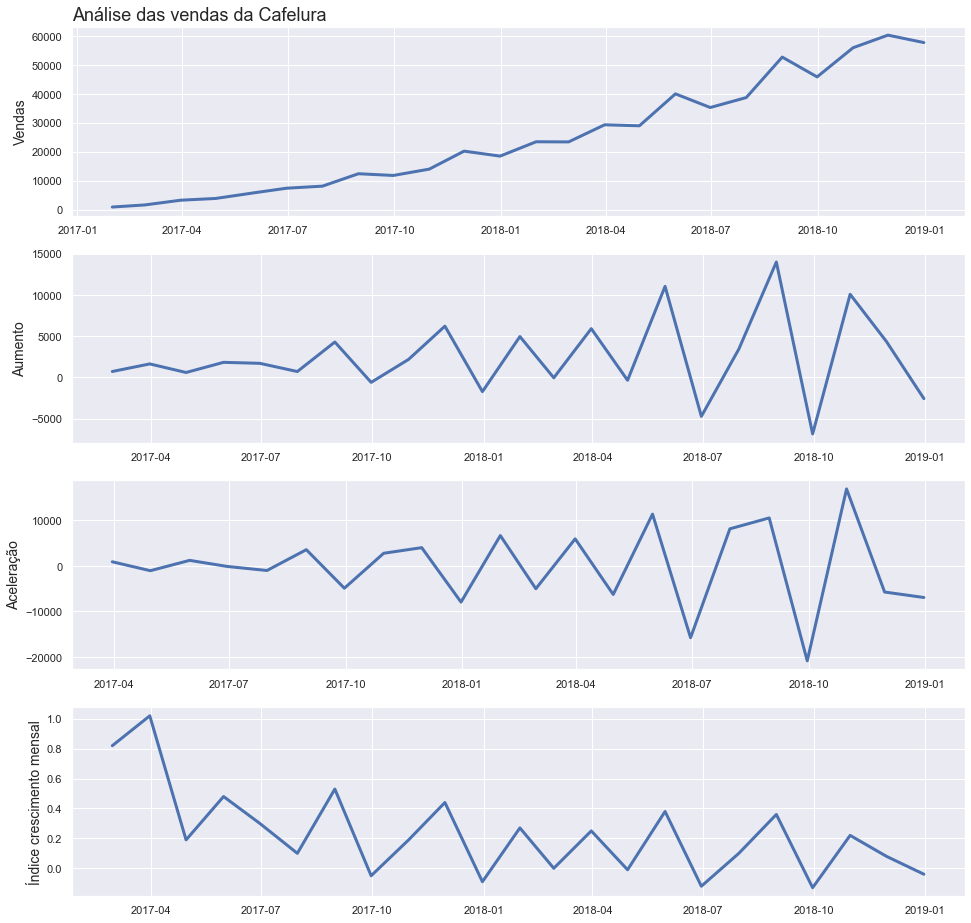

In [8]:
plt.figure(figsize=(16,16))

ax = plt.subplot(4,1,1)
ax.set_title('Análise das vendas da Cafelura',fontsize=18, loc='left')
lp_vendas = sns.lineplot(x='mes', y='vendas', data=cafelura, linewidth = 3)
lp_vendas.set_xlabel('')
lp_vendas.set_ylabel('Vendas', fontsize=14);

plt.subplot(4,1,2)
lp_aumento = sns.lineplot(x='mes', y='aumento', data=cafelura, linewidth = 3)
lp_aumento.set_xlabel('')
lp_aumento.set_ylabel('Aumento', fontsize=14);

plt.subplot(4,1,3)
lp_aceleracao = sns.lineplot(x='mes', y='aceleracao', data=cafelura, linewidth = 3)
lp_aceleracao.set_xlabel('')
lp_aceleracao.set_ylabel('Aceleração', fontsize=14);

plt.subplot(4,1,4)
lp_crescimento_mensal = sns.lineplot(x='mes', y='crescimento_mensal', data=cafelura, linewidth = 3)
lp_crescimento_mensal.set_xlabel('')
lp_crescimento_mensal.set_ylabel('Índice crescimento mensal', fontsize=14);

## Dias finais de semana

In [9]:
dias_final_semana = pd.read_csv('dados/dias_final_de_semana.csv')
dias_final_semana

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9
5,9
6,8
7,10
8,8
9,8


In [12]:
dias_final_semana.shape

(24, 1)

In [13]:
dias_final_semana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   quantidade_de_dias  24 non-null     int64
dtypes: int64(1)
memory usage: 320.0 bytes


## Normalização

In [15]:
cafelura['vendas_normalizadas'] = cafelura.vendas / dias_final_semana.quantidade_de_dias

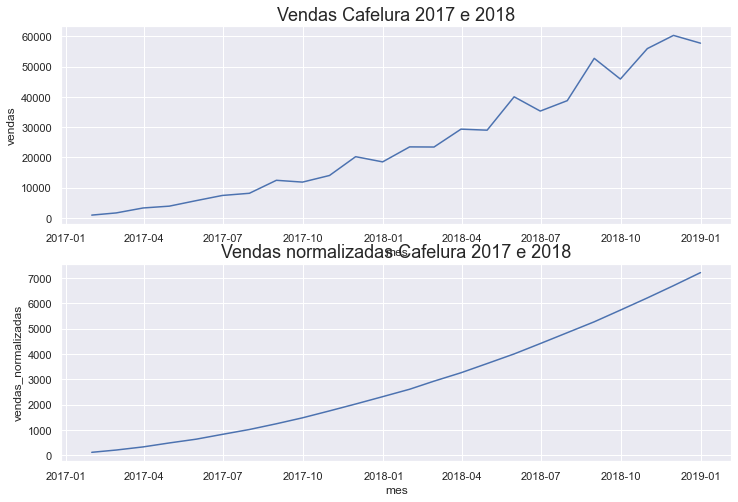

In [16]:
plt.figure(figsize=(12,8))
ax=plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax 